# Credit Card Fraud Detection

## Introduction

Project Objective: To build a machine learning model that detects fraudulent transactions in credit card data.

#### 1.Library & Data Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('creditcard.csv.crdownload') # dataloading

##### 2.Basic Data Overview

In [3]:
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
474,351,1.205444,0.008467,0.953782,1.141093,-0.491215,0.297303,-0.503913,0.084948,0.796497,...,-0.103663,-0.046173,-0.123765,-0.430029,0.559222,-0.360379,0.077359,0.032499,12.99,0.0
11007,18971,-1.690406,0.512403,2.210782,1.216122,-0.713994,0.962159,-0.595323,0.593745,2.423318,...,0.033731,0.978454,0.111830,0.186062,-0.297062,-0.314986,-0.311591,-0.028562,26.90,0.0
306,221,-0.342871,-0.199546,1.976353,-0.003495,-1.170366,0.883501,-0.151879,0.160106,0.137973,...,-0.313443,0.086207,0.109600,-0.098951,-0.943009,-0.618657,0.253306,0.240271,99.82,0.0
1211,938,-2.252996,0.164611,0.618369,-0.332608,-0.122234,-1.115583,-0.431424,0.952571,-0.429523,...,0.027982,-0.435522,-0.180991,0.362822,-0.269595,0.248303,-0.077964,-0.113453,1.00,0.0
11395,19884,-0.143063,0.189688,1.852167,-0.278139,-0.688109,-0.264003,-0.254186,-0.001812,0.244289,...,-0.019087,0.293521,-0.041659,0.361812,-0.429524,-0.199091,0.145555,0.131488,5.00,0.0


In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11665 entries, 0 to 11664
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    11665 non-null  int64  
 1   V1      11665 non-null  float64
 2   V2      11665 non-null  float64
 3   V3      11665 non-null  float64
 4   V4      11665 non-null  float64
 5   V5      11665 non-null  float64
 6   V6      11665 non-null  float64
 7   V7      11665 non-null  float64
 8   V8      11665 non-null  float64
 9   V9      11665 non-null  float64
 10  V10     11665 non-null  float64
 11  V11     11665 non-null  float64
 12  V12     11664 non-null  float64
 13  V13     11664 non-null  float64
 14  V14     11664 non-null  float64
 15  V15     11664 non-null  float64
 16  V16     11664 non-null  float64
 17  V17     11664 non-null  float64
 18  V18     11664 non-null  float64
 19  V19     11664 non-null  float64
 20  V20     11664 non-null  float64
 21  V21     11664 non-null  float64
 22

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,11665.000000,11665.000000,11665.000000,11665.000000,11665.000000,11665.000000,11665.000000,11665.000000,11665.000000,11665.000000,...,11664.000000,11664.000000,11664.000000,11664.000000,11664.000000,11664.000000,11664.000000,11664.000000,11664.000000,11664.000000
mean,7701.086069,-0.219601,0.274988,0.897990,0.281016,-0.078995,0.140055,-0.111620,-0.051877,0.893589,...,-0.061180,-0.155205,-0.034310,0.017421,0.101538,0.070630,0.007481,0.000804,62.795132,0.004201
std,5964.969525,1.561122,1.305785,1.272504,1.467970,1.184333,1.305472,1.129256,1.236992,1.182130,...,0.902556,0.624275,0.508488,0.592137,0.429725,0.560307,0.406841,0.262342,179.816783,0.064681
min,0.000000,-27.670569,-34.607649,-21.405836,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,...,-11.468435,-8.555808,-19.254328,-2.512377,-4.781606,-1.338556,-7.976100,-3.575312,0.000000,0.000000
25%,2463.000000,-0.987193,-0.257287,0.416175,-0.615559,-0.680719,-0.622413,-0.583742,-0.186419,0.181510,...,-0.268948,-0.545531,-0.172765,-0.332771,-0.146729,-0.346888,-0.080638,-0.015513,5.000000,0.000000
50%,6308.000000,-0.347783,0.262619,0.950034,0.215393,-0.179654,-0.147786,-0.088491,0.011665,0.880826,...,-0.130094,-0.129191,-0.044523,0.073145,0.139638,0.009023,-0.003818,0.015397,15.950000,0.000000
75%,11898.000000,1.159319,0.888750,1.616224,1.153380,0.348187,0.508886,0.439387,0.267067,1.570361,...,0.023295,0.235448,0.076761,0.402522,0.374859,0.417677,0.108443,0.073961,50.000000,0.000000
max,19915.000000,1.960497,9.067613,4.101716,11.927512,34.099309,21.393069,34.303177,5.499963,10.392889,...,22.599543,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


#### 3.Data Preprocessing

###### I.Handling Missing Values:

In [9]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [10]:
df.fillna(df.mean(), inplace=True)

##### II.Class Distribution:

In [6]:
df['Class'].value_counts()

0.0    11615
1.0       49
Name: Class, dtype: int64

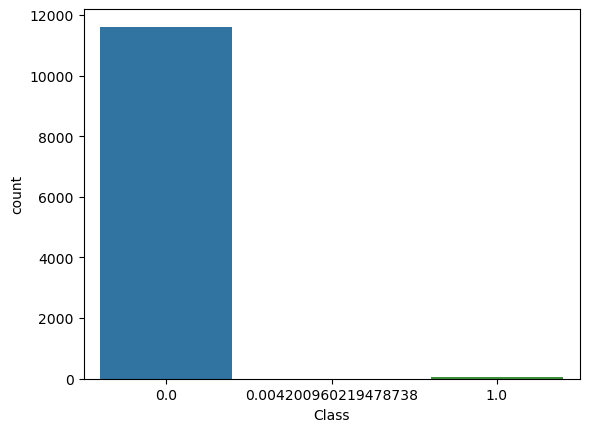

In [45]:
df['Class'].value_counts()
sns.countplot(x='Class', data=df)
plt.show()

Observation: The dataset is highly imbalanced with 0.42% of transactions being fraudulent.

#### III.Feature Scaling

In [11]:
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])

In [12]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(['Class'], axis=1))
df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_scaled['Class'] = df['Class']

### Modeling and Evaluation

###### Data Splitting and SMOTE:

In [13]:
X = df_scaled.drop('Class', axis=1)
y = df_scaled['Class']

In [14]:
y = y.astype(int)

In [15]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [16]:
y_res.value_counts()

0    11616
1    11616
Name: Class, dtype: int64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

#### Logistic Regression:

In [18]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

C:\Users\Aarthi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [19]:
y_pred = model.predict(X_test)

In [20]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      0.99      1.00      3502\n           1       0.99      1.00      1.00      3468\n\n    accuracy                           1.00      6970\n   macro avg       1.00      1.00      1.00      6970\nweighted avg       1.00      1.00      1.00      6970\n'

In [21]:
confusion_matrix(y_test, y_pred)

array([[3472,   30],
       [   0, 3468]], dtype=int64)

#### Decision Tree Classifier:

In [22]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [23]:
y_pred_dt = dt_model.predict(X_test)

In [24]:
classification_report(y_test, y_pred_dt)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      3502\n           1       1.00      1.00      1.00      3468\n\n    accuracy                           1.00      6970\n   macro avg       1.00      1.00      1.00      6970\nweighted avg       1.00      1.00      1.00      6970\n'

In [25]:
confusion_matrix(y_test, y_pred_dt)

array([[3498,    4],
       [   2, 3466]], dtype=int64)

#### Random Forest Classifier:

In [26]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
y_pred_rf = rf_model.predict(X_test)

In [28]:
classification_report(y_test, y_pred_rf)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      3502\n           1       1.00      1.00      1.00      3468\n\n    accuracy                           1.00      6970\n   macro avg       1.00      1.00      1.00      6970\nweighted avg       1.00      1.00      1.00      6970\n'

In [29]:
confusion_matrix(y_test, y_pred_rf)

array([[3501,    1],
       [   0, 3468]], dtype=int64)

### Feature Importance Visualization

In [30]:
feature_importances = rf_model.feature_importances_

In [31]:
feature_names = [
    'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 
    'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 
    'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 
    'V28', 'Amount']

In [32]:
features_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances})

In [33]:
features_df = features_df.sort_values(by='Importance', ascending=False)

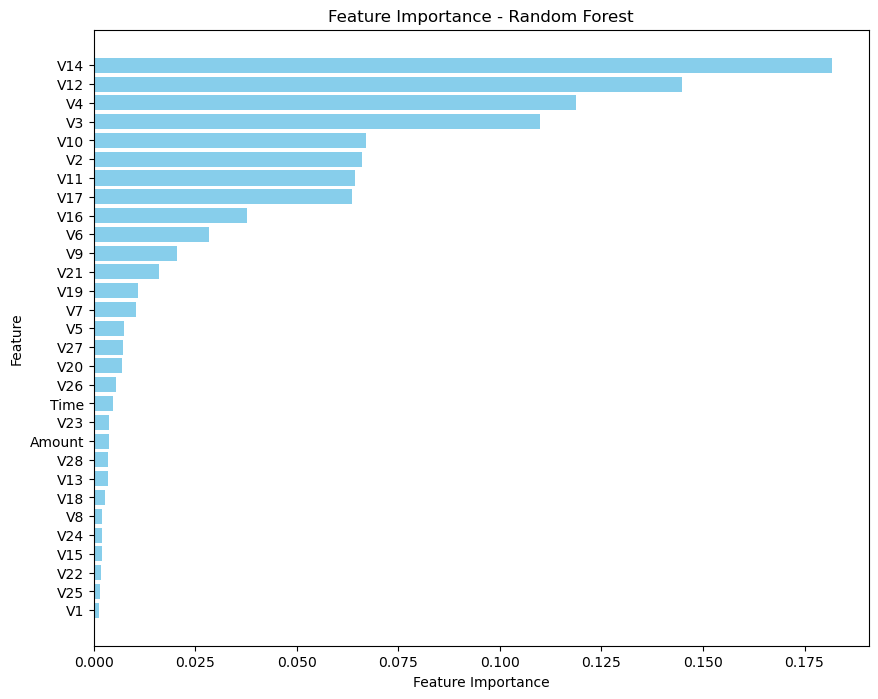

In [34]:
plt.figure(figsize=(10, 8))
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Random Forest')
plt.gca().invert_yaxis()
plt.show()

The feature importance plot shows that certain features, like V14, V12, and V4, have a significant impact on your model's predictions, while others like V22, V25, and V1 contribute much less.

### Hyperparameter Tuning

In [35]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']}

In [36]:
rf = RandomForestClassifier(random_state=42)

In [37]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

In [38]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


C:\Users\Aarthi\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [40]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [41]:
best_params

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [42]:
best_score

0.9995080858390212

In [46]:
best_rf_model = RandomForestClassifier(
    max_depth=best_params['max_depth'],
    max_features=best_params['max_features'],
    min_samples_leaf=best_params['min_samples_leaf'],
    min_samples_split=best_params['min_samples_split'],
    n_estimators=best_params['n_estimators'],
    random_state=42)

In [48]:
best_rf_model.fit(X_train, y_train)

C:\Users\Aarthi\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=10, max_features='auto', random_state=42)

In [49]:
y_pred_best_rf = best_rf_model.predict(X_test)

In [52]:
classification_report_best_rf = classification_report(y_test, y_pred_best_rf)
classification_report_best_rf

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      3502\n           1       1.00      1.00      1.00      3468\n\n    accuracy                           1.00      6970\n   macro avg       1.00      1.00      1.00      6970\nweighted avg       1.00      1.00      1.00      6970\n'

In [53]:
confusion_matrix_best_rf = confusion_matrix(y_test, y_pred_best_rf)
confusion_matrix_best_rf

array([[3501,    1],
       [   0, 3468]], dtype=int64)

#### Findings

## Conclusion

+ This project effectively demonstrated the application of machine learning techniques to detect fraudulent transactions in a highly imbalanced dataset. 
+ By utilizing models like Logistic Regression, Decision Tree, and especially Random Forest, the project showed how oversampling methods such as SMOTE can mitigate class imbalance issues, leading to improved detection of fraudulent activity.
+ The tuned Random Forest model, with its exceptional precision and recall, stands out as a robust solution for real-world fraud detection systems.